In [8]:
import os
import pandas as pd
import pathlib
import numpy as np
from IPython import display
from numpy import asarray
import pathlib
import tensorflow as tf
from tensorflow.keras.metrics import MeanIoU
import matplotlib.pyplot as plt

In [2]:
# Defining constants, has to pick specific name of any of the images
path_y = '/home/lewagon/code/Dponomareva/test/data/Target'
batch_size = 32
mask_shape = tf.image.decode_png(tf.io.read_file("/home/lewagon/code/Dponomareva/test/data/Target/austin1.tif_0_0.png"), channels = 1).shape

2022-11-30 16:03:10.277272: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-30 16:03:10.277322: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-30 16:03:10.277340: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (SLB-G9SSST2): /proc/driver/nvidia/version does not exist
2022-11-30 16:03:10.277579: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


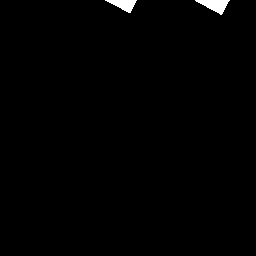

In [11]:
tf.keras.preprocessing.image.load_img('/home/lewagon/code/Dponomareva/test/data/Target/austin1.tif_0_0.png')

In [3]:
def process_path(mask_path):
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels = 1) / 255
    mask_zeros = tf.zeros(mask_shape, tf.int32)
    return mask, mask_zeros

In [4]:
def batch_data(path_y, batch_size):
    y_names = os.listdir(path_y)
    y_path = [f'{path_y}/{file}' for file in y_names]
    ds_train = tf.data.Dataset.from_tensor_slices((y_path))
    return ds_train.map(process_path).batch(batch_size)

In [5]:
#to check how mapping is working
for mask in batch_data(path_y, batch_size):
    print(mask[0].shape)
    print(mask[1].shape)
    break

(32, 256, 256, 1)
(32, 256, 256, 1)


In [6]:
baseline_ds = batch_data(path_y, batch_size)

In [7]:
m = tf.keras.metrics.MeanIoU(num_classes=2)
ac = tf.keras.metrics.Accuracy()
for mask, mask_zeros in baseline_ds:
    m.update_state(mask, mask_zeros)
    ac.update_state(mask, mask_zeros)

m.result().numpy(), ac.result().numpy()

(0.4461315, 0.8922631)